In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import SimpleITK as sitk
import scipy.ndimage
import pathlib
import os

In [3]:
def figure_with_zoom_in(img, roi = None, size = None, vmin=-160, vmax=240, dpi=200):
    if roi is not None:
        if size is None:
            size = [img.shape[0] * 0.38, img.shape[1] * 0.38]
        patch = img[roi[0]:roi[2], roi[1]:roi[3]]
        zooms = [size[0] / patch.shape[0], size[1] / patch.shape[1]]
        patch = scipy.ndimage.zoom(patch, min(zooms), order = 0)
        img[-patch.shape[0]:, -patch.shape[1]:] = patch
    
    fig = plt.figure(figsize = [4,4], dpi = dpi)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, 'gray', vmin=vmin, vmax=vmax)
    
    # add plot
    if roi is not None:
        ys = [roi[0], roi[0], roi[2], roi[2], roi[0]]
        xs = [roi[1], roi[3], roi[3], roi[1], roi[1]]
        ax.plot(xs, ys, 'y--')
    
    plt.close()
    
    return fig

In [4]:
margin = 96
vmin = 40-175
vmax = 40+175

In [5]:
# figure 1: show mayo quarter dose L291
# reference, low-dose FBP, l2 universal, wgan universal, l2 matched and ensemble
'''
filenames = [
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/full/fbp/L291.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/fbp/L291.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/l2/L291_all.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/wgan/L291_all.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/ensemble/L291.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/l2/L291.nii',
]
output_dir = './L291_slice_22'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

islice = 22
figs = []
for filename in filenames:
    img = sitk.GetArrayFromImage(sitk.ReadImage(filename))[islice, margin:-margin, margin:-margin]
    figs.append(figure_with_zoom_in(img, roi = [180, 70, 260, 150], vmin=vmin, vmax=vmax))
    
    file_path = pathlib.Path(filename)
    figs[-1].savefig(os.path.join(output_dir, '_'.join([file_path.parents[1].name, file_path.parents[0].name, file_path.stem]) + '.png'))
'''

"\nfilenames = [\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/full/fbp/L291.nii',\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/fbp/L291.nii',\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/l2/L291_all.nii',\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/wgan/L291_all.nii',\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/ensemble/L291.nii',\n    '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean/quarter/l2/L291.nii',\n]\noutput_dir = './L291_slice_22'\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\nislice = 22\nfigs = []\nfor filename in filenames:\n    img = sitk.GetArrayFromImage(sitk.ReadImage(filename))[islice, margin:-margin, margin:-margin]\n    figs.append(figure_with_zoom_in(img, roi = [180, 70, 260, 150], vmin=vmin, vmax=vmax))\n    \n    file_path = pathlib.Path(file

In [6]:
# figure 2: show mayo simulated dose 2,4,6,8. Only show liver
# with reconstruction methods FBP, l2 universal, wgan universal, l2 matched and ensemble
'''
source_dir = '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean'
filenames = [os.path.join(source_dir, 'full/fbp/L291.nii')]
tags = ['fbp/L291.nii', 'l2/L291_all.nii', 'wgan/L291_all.nii', 'ensemble/L291.nii', 'l2/L291.nii']
for dose in [2,4,6,8]:
    for tag in tags:
        filenames.append(os.path.join(source_dir, 'dose_rate_%d'%dose, tag))

output_dir = './L291_slice_22_dose'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
islice = 22
figs = []
for filename in filenames:
    img = sitk.GetArrayFromImage(sitk.ReadImage(filename))[islice, margin:-margin, margin:-margin]
    img = img[65:321, :256]
    figs.append(figure_with_zoom_in(img, vmin=vmin, vmax=vmax))
    
    file_path = pathlib.Path(filename)
    figs[-1].savefig(os.path.join(output_dir, '_'.join([file_path.parents[1].name, file_path.parents[0].name, file_path.stem]) + '.png'))
'''

"\nsource_dir = '/home/dwu/trainData/deep_denoiser_ensemble/test/mayo_2d_3_layer_mean'\nfilenames = [os.path.join(source_dir, 'full/fbp/L291.nii')]\ntags = ['fbp/L291.nii', 'l2/L291_all.nii', 'wgan/L291_all.nii', 'ensemble/L291.nii', 'l2/L291.nii']\nfor dose in [2,4,6,8]:\n    for tag in tags:\n        filenames.append(os.path.join(source_dir, 'dose_rate_%d'%dose, tag))\n\noutput_dir = './L291_slice_22_dose'\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n    \nislice = 22\nfigs = []\nfor filename in filenames:\n    img = sitk.GetArrayFromImage(sitk.ReadImage(filename))[islice, margin:-margin, margin:-margin]\n    img = img[65:321, :256]\n    figs.append(figure_with_zoom_in(img, vmin=vmin, vmax=vmax))\n    \n    file_path = pathlib.Path(filename)\n    figs[-1].savefig(os.path.join(output_dir, '_'.join([file_path.parents[1].name, file_path.parents[0].name, file_path.stem]) + '.png'))\n"

In [7]:
# figure 3: a DECT image
# with normal-dose, half-FBP, l2-universal, wgan and ensemble
# use image 56

filenames = [
    '/home/dwu/trainData/deep_denoiser_ensemble/test/dect_2d_3_layer_mean/full/fbp/56_b.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/dect_2d_3_layer_mean/half/fbp/56_b.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/dect_2d_3_layer_mean/half/l2/56_all_b.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/dect_2d_3_layer_mean/half/wgan/56_all_b.nii',
    '/home/dwu/trainData/deep_denoiser_ensemble/test/dect_2d_3_layer_mean/half/ensemble/56_b.nii',
]
output_dir = './dect_56_slice_86_ref_85'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

islice_half = 86
islice_ref = 85
figs = []
for filename in filenames:
    if 'full/fbp' in filename:
        islice = islice_ref
    else:
        islice = islice_half
    
    img = sitk.GetArrayFromImage(sitk.ReadImage(filename))[islice, margin:-margin, margin:-margin]
    figs.append(figure_with_zoom_in(img, roi = [180, 70, 260, 150], vmin=vmin, vmax=vmax))
    
    file_path = pathlib.Path(filename)
    figs[-1].savefig(os.path.join(output_dir, '_'.join([file_path.parents[1].name, file_path.parents[0].name, file_path.stem]) + '.png'))

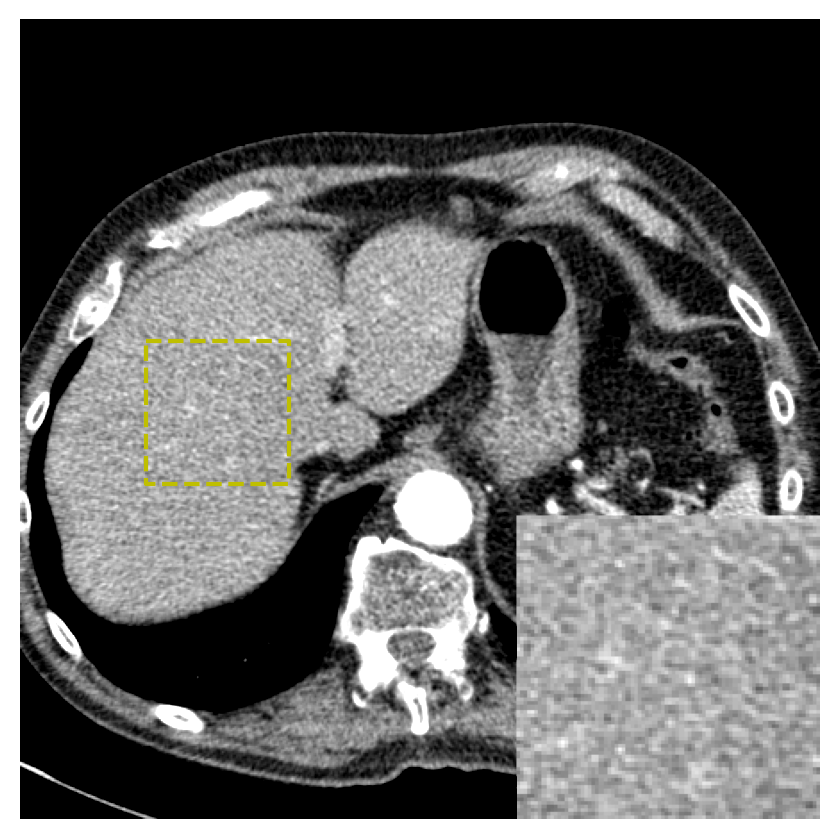

In [37]:
figs[0]

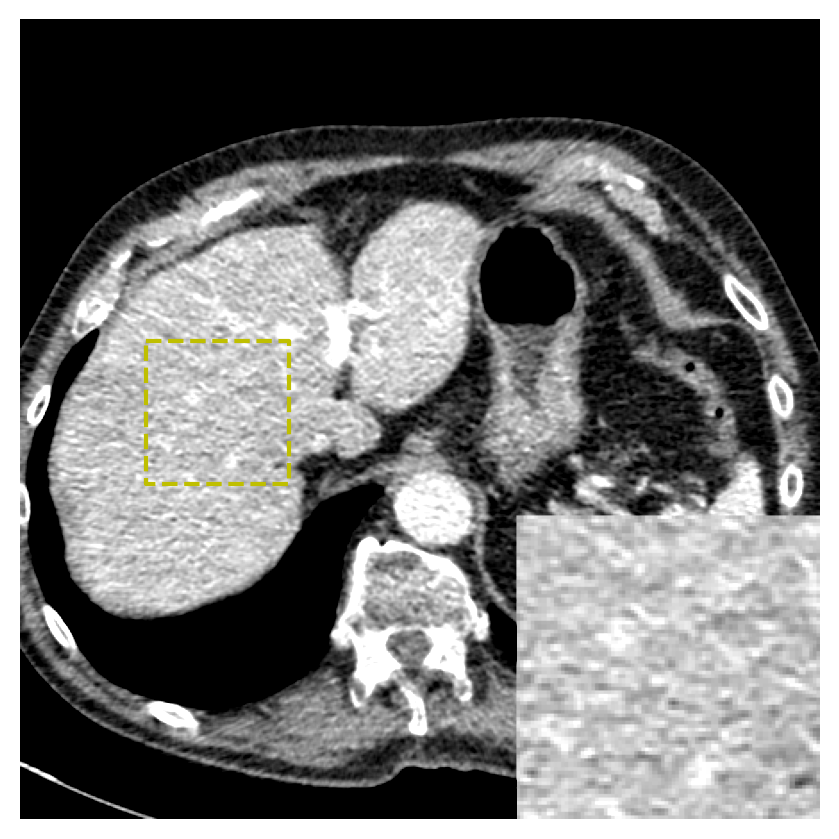

In [38]:
figs[2]

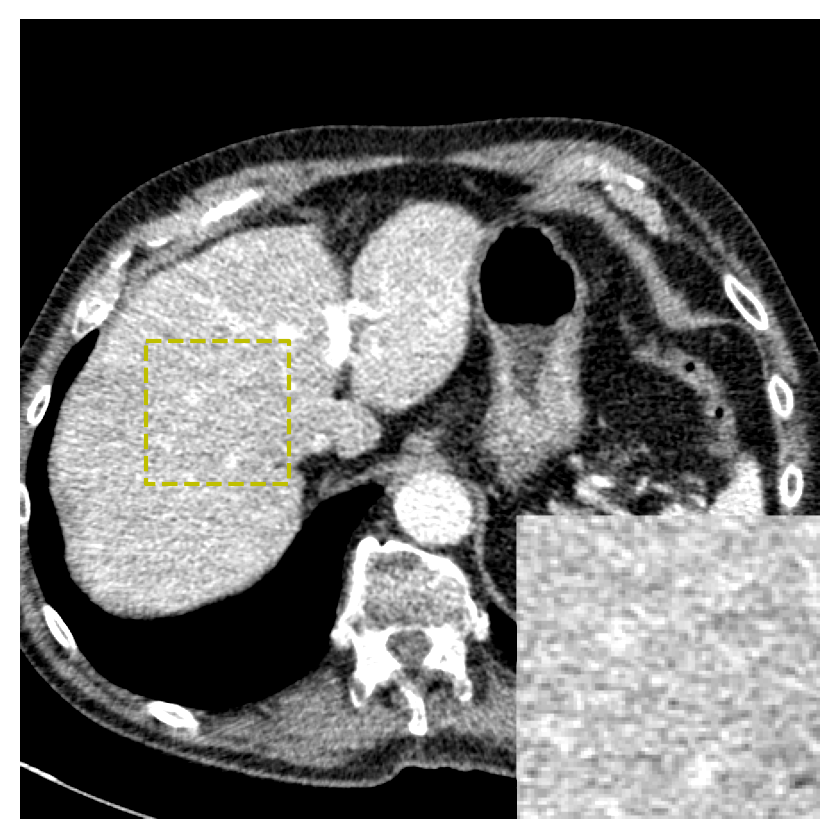

In [39]:
figs[4]